# Spectral Clustering notebook

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

/Users/jcid/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# 1. Dataset generation

For illustrating the properties of Spectral clustering we will rely on two different datasets. One of them consists of 4 convex clusters generated from a Gaussian distribution, and the second contains two concentric rings, which makes the identification of clusters significantly more difficult.

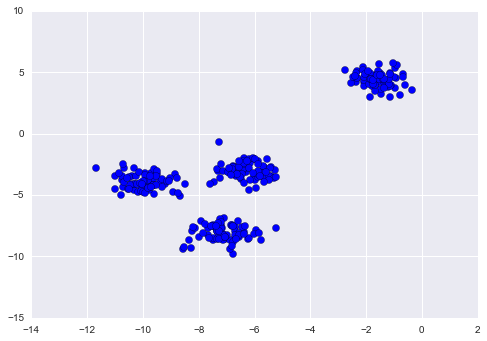

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=1, cluster_std=0.60, shuffle = False)
plt.scatter(X[:, 0], X[:, 1], s=50);


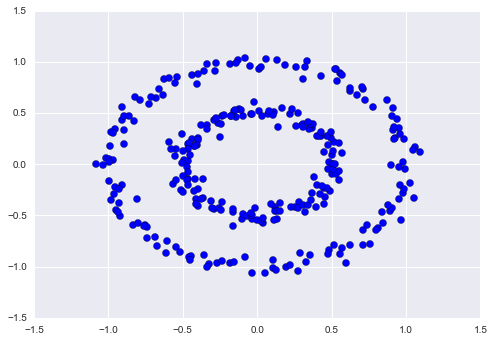

In [3]:
from sklearn.datasets.samples_generator import make_circles
X2, y2 = make_circles(n_samples=300, factor=.5, noise=.05, shuffle=False)
plt.scatter(X2[:, 0], X2[:, 1], s=50);


**Exercise:**

Using the code of the previous notebook, run the $K$-means algorithm for the two datasets. In the light of your results, why do you think $K$-means does not work well for the second dataset?

# 2. Affinity Matrix properties

The first step for applying spectral clustering is to create an affinity matrix of size $\mbox{n_samples} \times \mbox{n_samples}$. Different distances and similarity functions are available for this. Scikit-learn implements a number of so-called kernels that can be used with this purpose:

http://scikit-learn.org/stable/modules/metrics.html

In this session, we will use the *rbf* kernel, that computes the similarity between two data points as:

$$\kappa({\bf x},{\bf y}) = \exp(-\gamma \|{\bf x}-{\bf y}\|^2)$$

The following fragment of code illustrates all pairs of distances between any two points in the dataset. The second plot illustrates the eigenvalues corresponding to the 20 most significant eigenvectors of the affinity matrix.

**Exercise:** 

Modify the selection of $\gamma$, and check the effect of this in the appearance of the similarity matrix. Write down the values for which you consider that the structure of the matrix better resembles the number of clusters in the datasets.

(300, 300)


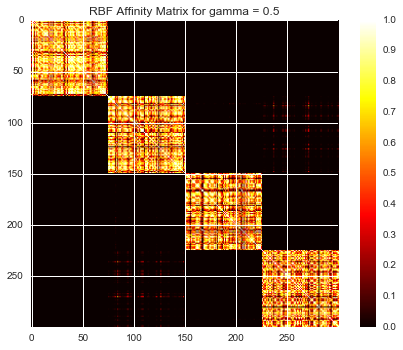

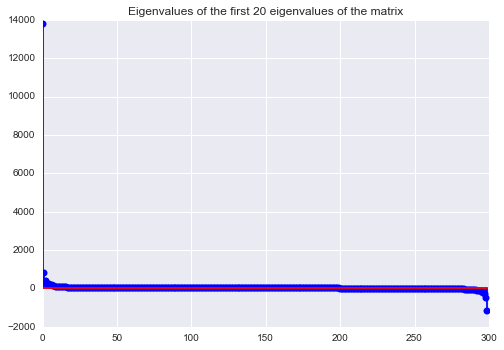

In [51]:
from sklearn.metrics.pairwise import rbf_kernel

gamma =0.5

K = rbf_kernel(X,X,gamma=gamma)
D = np.sum(K, axis=0)
L = D-K
print L.shape
plt.imshow(K,cmap='hot');
plt.colorbar();
plt.title('RBF Affinity Matrix for gamma = ' + str(gamma));

# Next, we compute the eigenvalues of the matrix
w = np.linalg.eigvalsh(L)
plt.figure();
plt.stem((w[::-1][0:300]));
plt.title('Eigenvalues of the first 20 eigenvalues of the matrix')



**Exercise:**

Repeat the previous analysis for the second dataset (*two-rings*).

# 3. Results of Spectral clustering

Finally, we are going to run spectral clustering on both datasets. Spend a few minutes figuring out the meaning of parameters of the Spectral Clustering implementation of Scikit-learn:

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

The following piece of code executes the algorithm with an 'rbf' kernel. You can manually adjust the number of clusters and the parameter of the kernel to study the behavior of the algorithm. When you are done, you can also:

  - Modify the code to allow for kernels different than the 'rbf'
  - Repeat the analysis for the second dataset (*two_rings*)

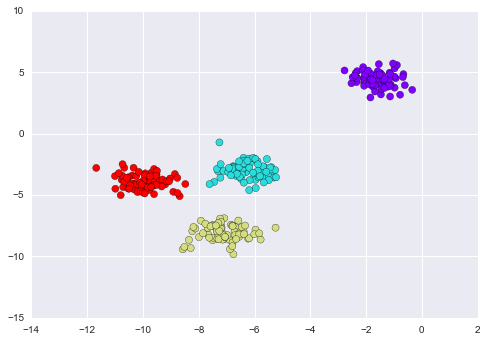

In [17]:
from sklearn.cluster import SpectralClustering

n_clusters = 4
gamma = .1 #Warning do not exceed gamma=100

SpClus = SpectralClustering(n_clusters=n_clusters,affinity='rbf',gamma=gamma)
SpClus.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=SpClus.labels_.astype(np.int), s=50, cmap='rainbow');

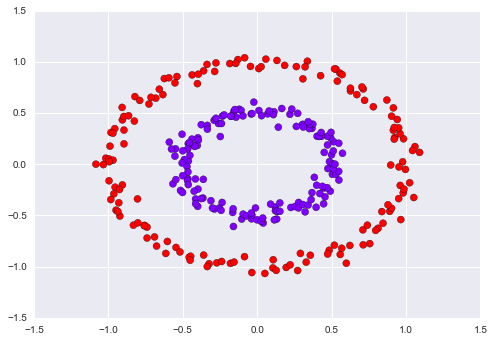

In [46]:
from sklearn.cluster import SpectralClustering

n_clusters = 2
gamma = 50  #Warning do not exceed gamma=300

SpClus = SpectralClustering(n_clusters=n_clusters,affinity='rbf',gamma=gamma)
SpClus.fit(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=SpClus.labels_.astype(np.int), s=50, cmap='rainbow');

/Users/jcid/anaconda/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:215: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


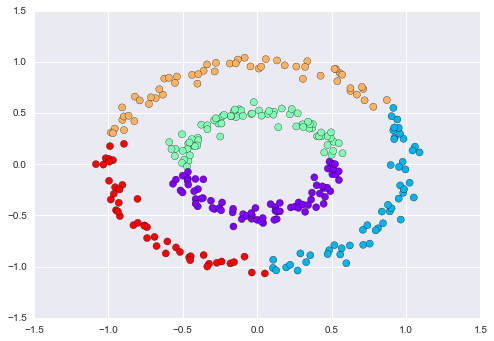

In [47]:
from sklearn.cluster import SpectralClustering

n_clusters = 5

SpClus = SpectralClustering(n_clusters=n_clusters,affinity='nearest_neighbors')
SpClus.fit(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=SpClus.labels_.astype(np.int), s=50, cmap='rainbow');